In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

### Importing file

In [3]:
stup=pd.read_csv("50_Startups.csv")
stup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
#rename of columns
stup=stup.rename({'R&D Spend':'rd_sp','Administration':'admn','Marketing Spend':'mar_spn','State':'state','Profit':'pro'},axis=1)
stup

,rd_sp,admn,mar_spn,state,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rd_sp    50 non-null     float64
 1   admn     50 non-null     float64
 2   mar_spn  50 non-null     float64
 3   state    50 non-null     object 
 4   pro      50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
stup.isna().sum()

rd_sp      0
admn       0
mar_spn    0
state      0
pro        0
dtype: int64

## Correlation

In [7]:
stup.corr()

,rd_sp,admn,mar_spn,pro
rd_sp,1.000000,0.241955,0.724248,0.972900
admn,0.241955,1.000000,-0.032154,0.200717
mar_spn,0.724248,-0.032154,1.000000,0.747766
pro,0.972900,0.200717,0.747766,1.000000


## Scatterplot b.w variables and histogram

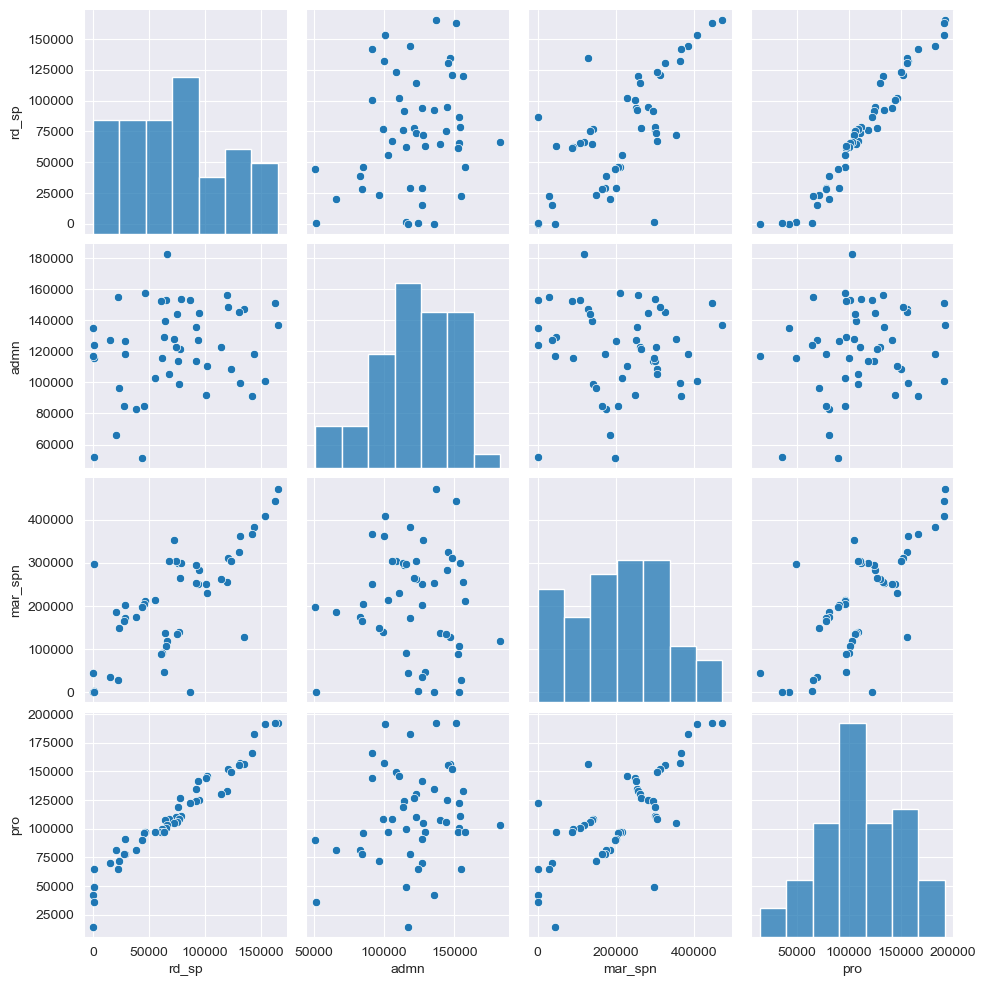

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(stup)

## Building model

In [9]:
import statsmodels.formula.api as smf
model=smf.ols('pro~rd_sp+admn+mar_spn',data=stup).fit()

In [10]:
# t and p values
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 rd_sp        17.846374
 admn         -0.525507
 mar_spn       1.655077
 dtype: float64,
 Intercept    0.00000
 rd_sp        0.00000
 admn         0.60176
 mar_spn      0.10472
 dtype: float64)

In [11]:
# r squared and adjacent r-squared values
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## Simple linear regression models

In [12]:
# simple linear regression model for profit and administration
import statsmodels.formula.api as smf
slr1=smf.ols('pro~admn',data=stup).fit()

In [13]:
slr1.pvalues

Intercept    0.003824
admn         0.162217
dtype: float64

In [14]:
# simple linear regression model for profit and marketing spend
import statsmodels.formula.api as smf
slr2=smf.ols('pro~mar_spn',data=stup).fit()

In [15]:
slr2.pvalues

Intercept    4.294735e-10
mar_spn      4.381073e-10
dtype: float64

In [16]:
# model for profit and administration+marketing spend
mlr3=smf.ols('pro~admn+mar_spn',data=stup).fit()

In [17]:
mlr3.pvalues

Intercept    2.589341e-01
admn         1.729198e-02
mar_spn      9.727245e-11
dtype: float64

# calculating VIF values

In [18]:
rsq_rd_sp=smf.ols('rd_sp~admn+mar_spn',data=stup).fit().rsquared  
vif_rd_sp= 1/(1-rsq_rd_sp)
rsq_admn=smf.ols('admn~rd_sp+mar_spn',data=stup).fit().rsquared  
vif_admn = 1/(1-rsq_admn)
rsq_mar_spn=smf.ols('mar_spn~rd_sp+admn',data=stup).fit().rsquared  
vif_mar_spn = 1/(1-rsq_mar_spn)
# Storing vif values in a data frame
d1 = {'Variables':['rd_sp','admn','mar_spn'],'VIF':[vif_rd_sp,vif_admn,vif_mar_spn]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame     #since VIF values are <5 all are included in the model

,Variables,VIF
0,rd_sp,2.468903
1,admn,1.175091
2,mar_spn,2.326773


## Model validation techniques or residual analysis

### Residual plot

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

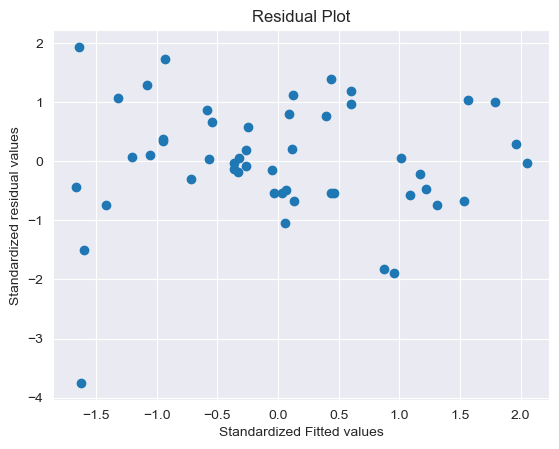

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Q-Q plot

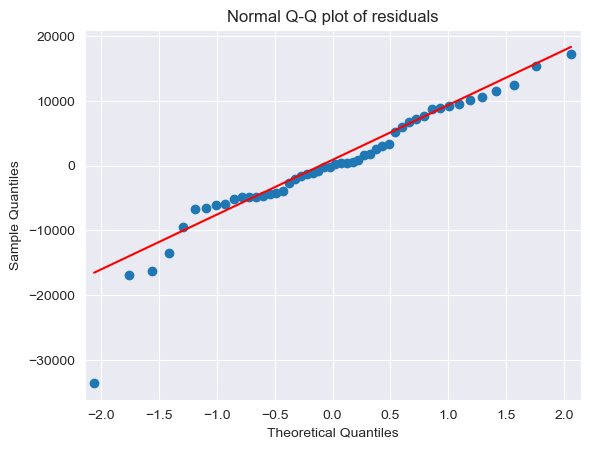

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residuals-Regressors

eval_env: 1


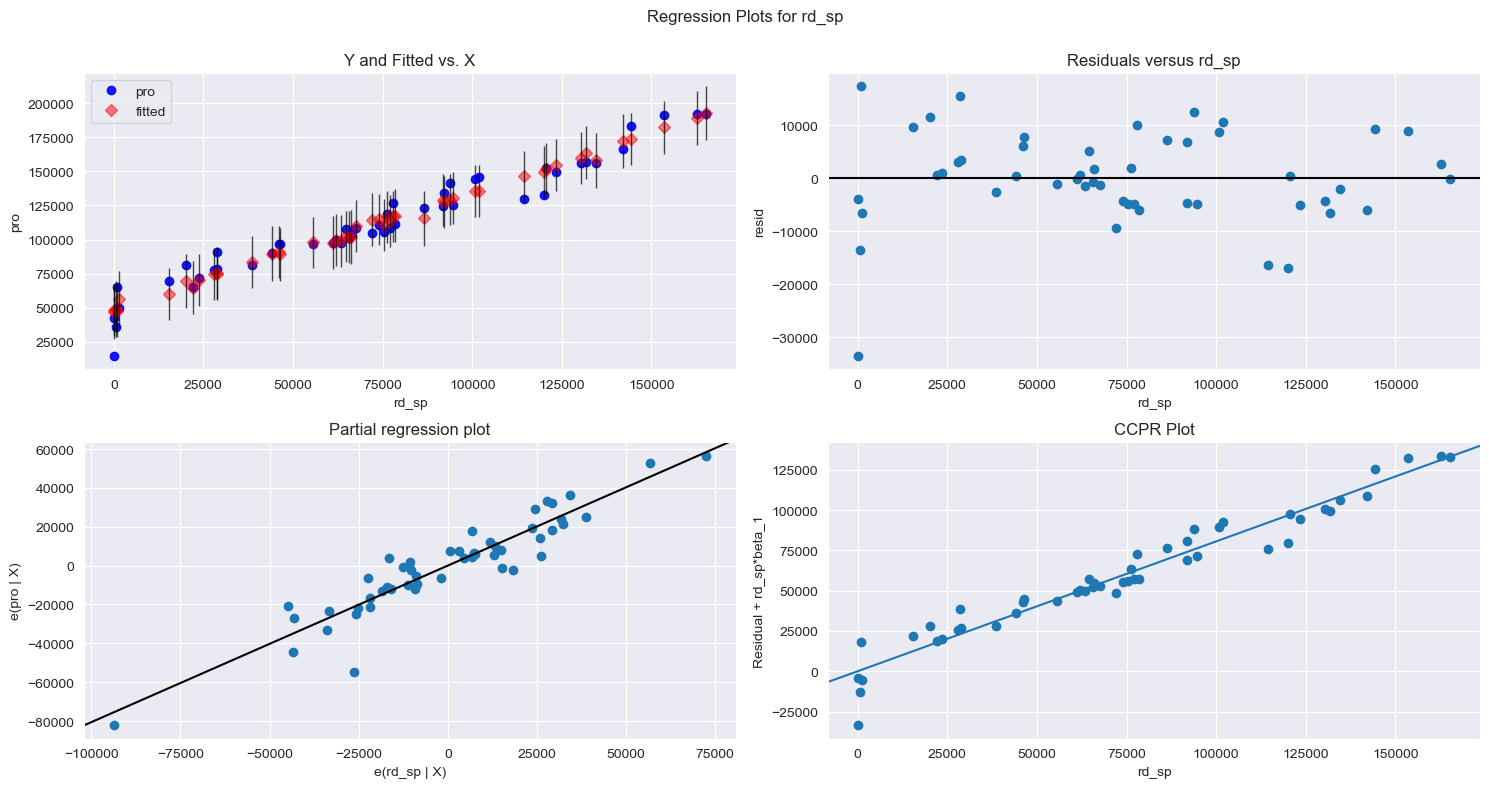

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd_sp", fig=fig)
plt.show()

eval_env: 1


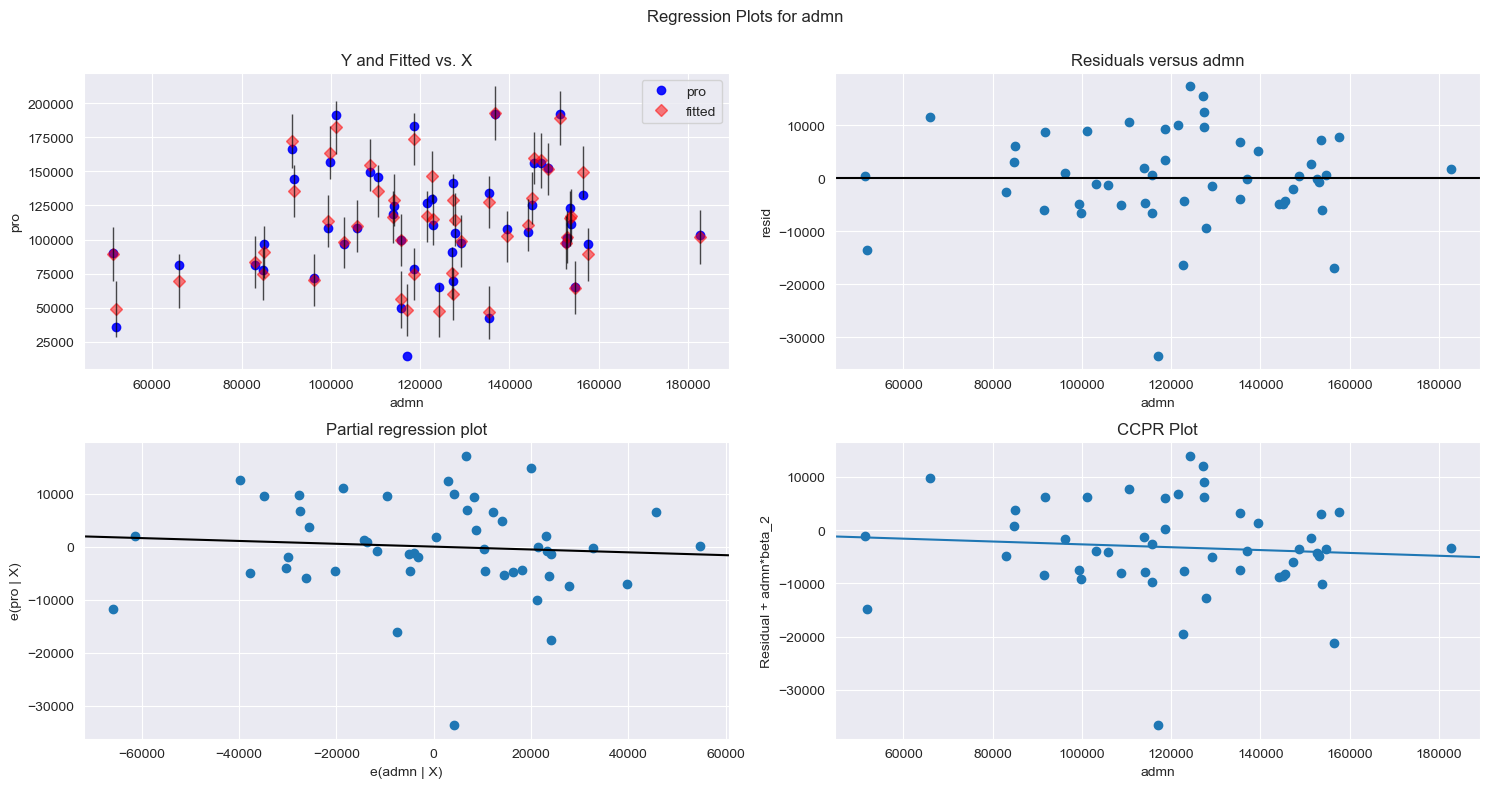

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admn", fig=fig)
plt.show()

eval_env: 1


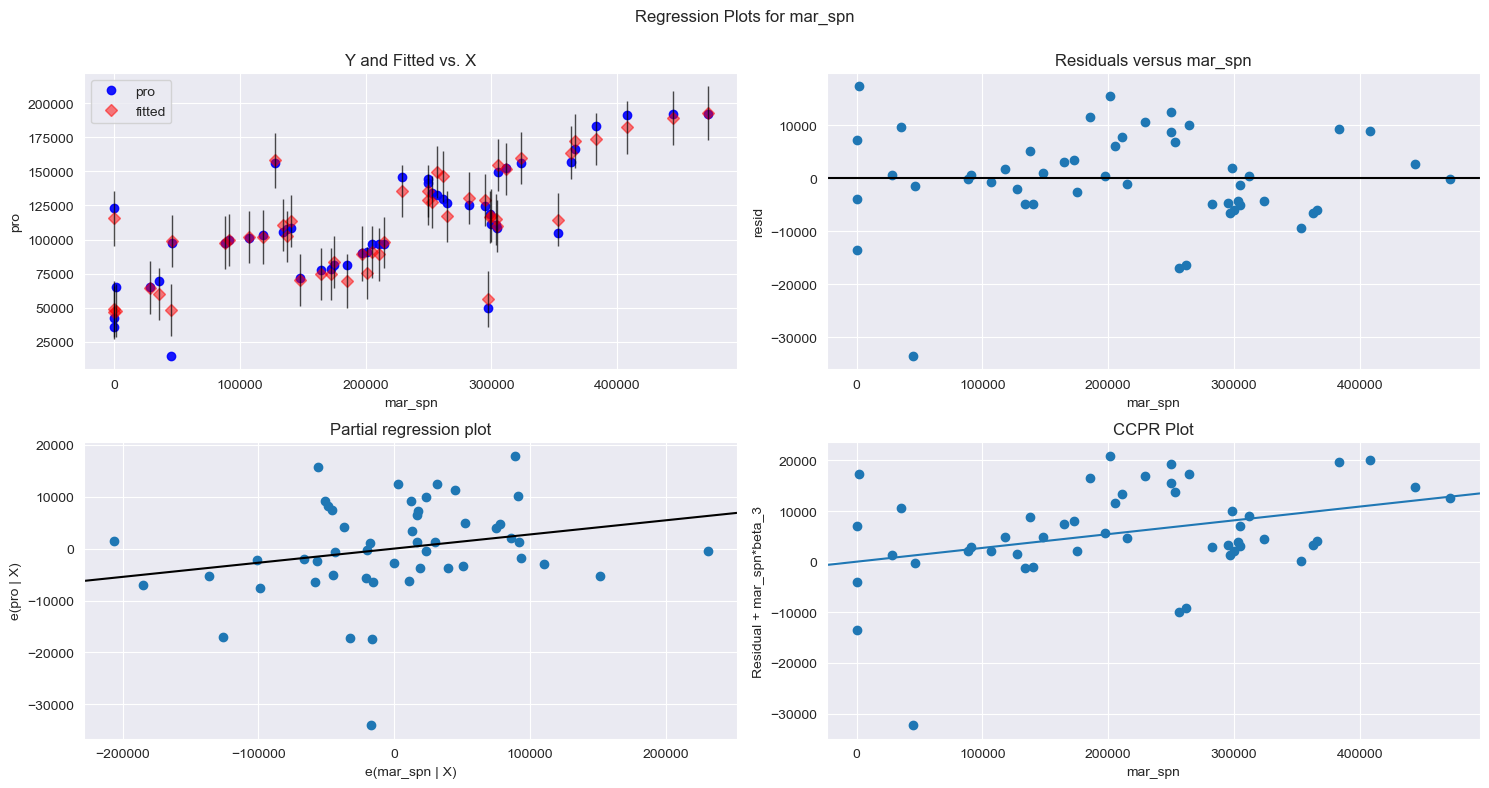

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mar_spn", fig=fig)
plt.show()

# Model deletion diagnostics

### Deletion of influencers/outliers

### Cook's distance

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

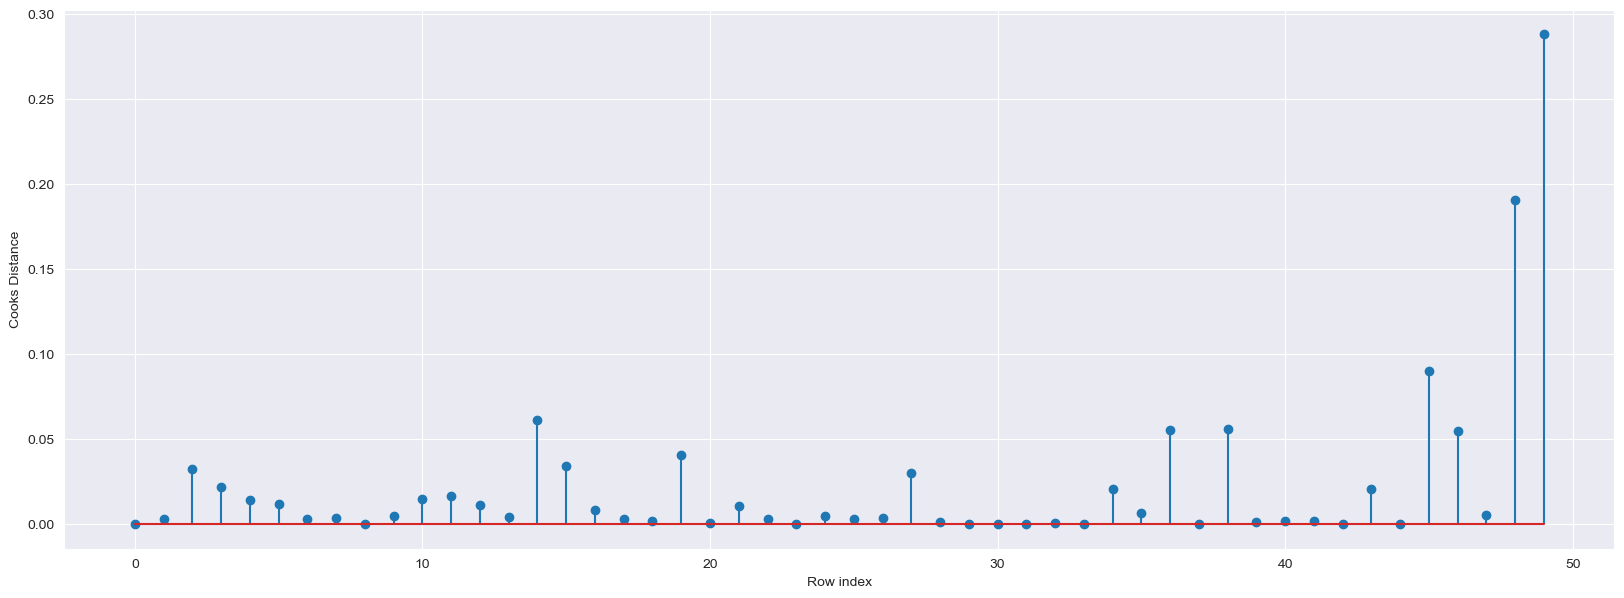

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(stup)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

### High influence points

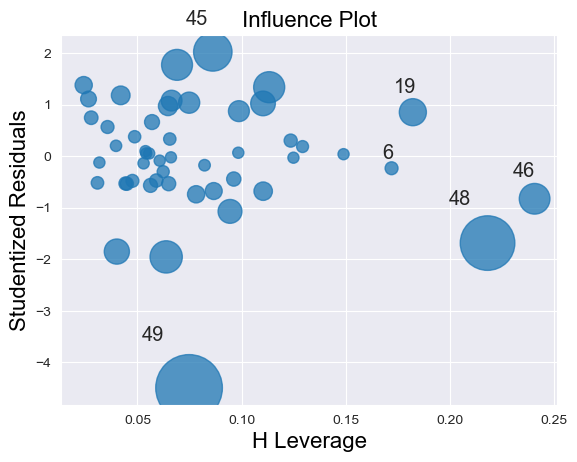

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
k =stup.shape[1]
n = stup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

### Improving model

In [30]:
stup[stup.index.isin([49])]

,rd_sp,admn,mar_spn,state,pro
49,0.0,116983.8,45173.06,California,14681.4


In [31]:
stup1=stup.drop(stup.index[[49]],axis=0).reset_index()

In [32]:
stup1=stup1.drop(['index'],axis=1)
stup1

,rd_sp,admn,mar_spn,state,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Build model on new data

In [33]:
import statsmodels.formula.api as smf
model1=smf.ols('pro~rd_sp+admn+mar_spn',data=stup1).fit()

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pro   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        15:29:03   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd_sp          0.7830      0.038     20.470      0.000       0.706       0.860
admn          -0.0222      0.043     -0.518      0.607      -0.109       0.064
mar_spn        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model1.rsquared

0.9613162435129847

In [36]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

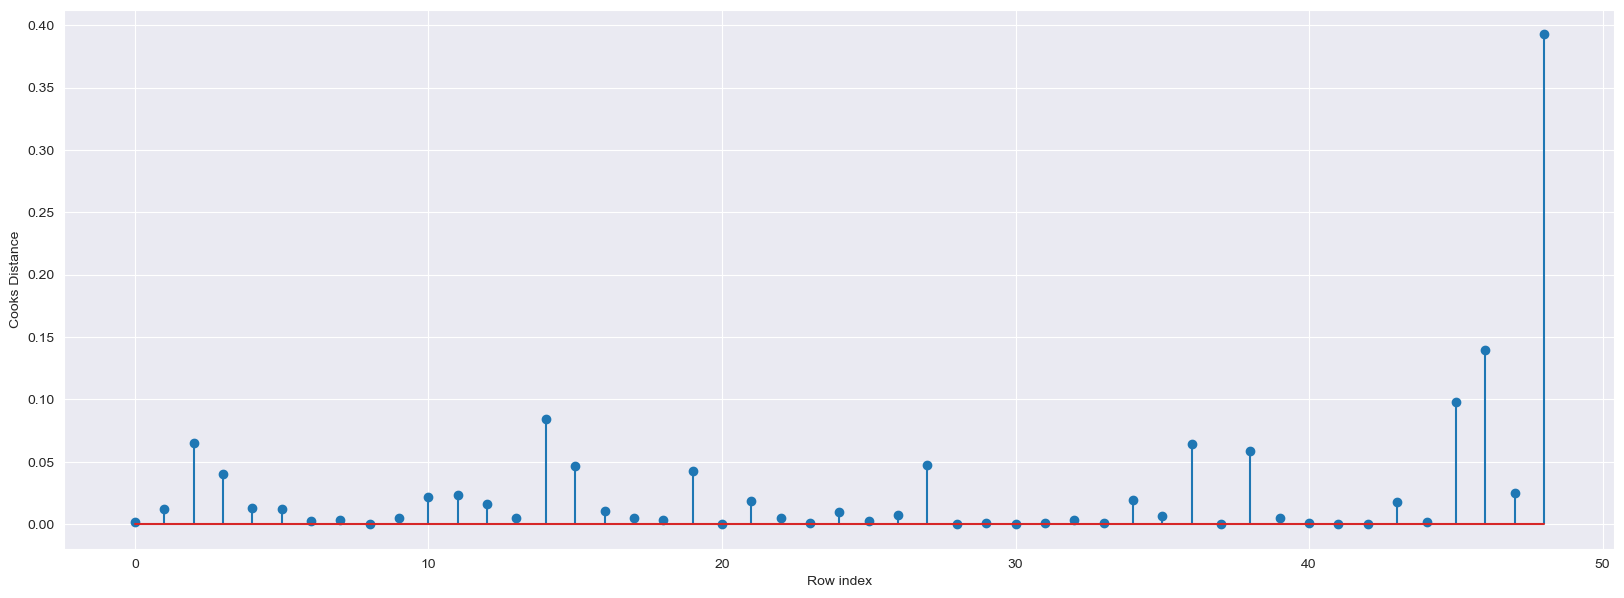

In [37]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(stup1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321554)

In [47]:
stup2=stup1.drop(stup1.index[[48]],axis=0).reset_index()

In [48]:
stup2=stup2.drop(['index'],axis=1)
stup2

,rd_sp,admn,mar_spn,state,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### build model on new data

In [49]:
import statsmodels.formula.api as smf
finalmodel=smf.ols('pro~rd_sp+admn+mar_spn',data=stup2).fit()

In [50]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pro   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           2.03e-31
Time:                        15:31:43   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd_sp          0.7895      0.036     21.718      0.000       0.716       0.863
admn          -0.0633      0.044     -1.442      0.156      -0.152       0.025
mar_spn        0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
finalmodel.rsquared

0.9626766170294073

### Predictions for new data

In [52]:
new_data=pd.DataFrame({"rd_sp":48500,"admn":65450,"mar_spn":102450},index=[1])
new_data

,rd_sp,admn,mar_spn
1,48500,65450,102450


In [53]:
finalmodel.predict(new_data)

1    94973.697103
dtype: float64

### R^2 values

In [54]:
dt={'Prepared models':['Model','Model1','Finalmodel'],'R-squared':[model.rsquared,model1.rsquared,finalmodel.rsquared]}
table=pd.DataFrame(dt)
table

,Prepared models,R-squared
0,Model,0.950746
1,Model1,0.961316
2,Finalmodel,0.962677
